# Midterm - Matt's demographic data

First I'll import pandas, geopandas, contextily, and pyplot. Pandas is good for general data exploration and analysis, and geopandas will read spatial data. Contextily provides basemaps and pyplot will give me some extra tools to use in data analysis. Then I'll load the data I got from CalEnviroScreen (CES). The CES data is in a shapefile, which means I have to import a whole folder in order to get all the data I need instead of just one file.

In [35]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px

In [36]:
gdf = gpd.read_file('CES2018 data/CES3June2018Update.shp')

Now I'll check the type of data just to make sure it came in correctly.

## Data exploration

In [37]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

Good, it's a geodataframe. I want to get a few birds-eye views of the data before I do any in-depth exploration or analysis.

In [38]:
# to see the size of the dataframe
gdf.shape

(8035, 71)

I've got 8035 rows and 71 columns of data. I'll have to narrow that down, but I'll get to that later. Let's plot it and see what happens. I expect it'll show a map of California.

In [39]:
# to see the first five rows of data
gdf.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,ozone,...,Native_Ame,Asian_Amer,Other_pct,OBJECTID_1,CIdecile,CIvigintil,Shape_Leng,Shape_Area,CES2018_Rn,geometry
0,6.083002e+09,3930,Santa Barbara,93454,Santa Maria,-120.427059,34.930669,29.51,59,0.035,...,0.5,7.2,1.6,3507,6,12,6999.357622,2.847611e+06,55-60%,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,11406,Santa Barbara,93455,Santa Maria,-120.478083,34.928796,33.17,65,0.035,...,0.2,5.5,1.6,2733,7,14,19100.578003,1.635292e+07,65-70%,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,2084,Santa Barbara,93454,Santa Maria,-120.426777,34.942111,22.85,45,0.035,...,0.5,2.9,2.6,4689,5,9,4970.985933,1.352330e+06,40-45%,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,4375,Santa Barbara,93455,Santa Maria,-120.410028,34.871428,4.45,2,0.035,...,0.6,4.0,2.6,7864,1,1,6558.956142,2.417717e+06,1-5% (lowest scores),"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,3826,Santa Barbara,93455,Santa Maria,-120.427716,34.872288,5.28,3,0.035,...,0.8,3.5,3.2,7863,1,1,6570.368642,2.608422e+06,1-5% (lowest scores),"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


In [40]:
# to see all columns and the type of data in each column
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 71 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tract       8035 non-null   float64 
 1   pop2010     8035 non-null   int64   
 2   California  8035 non-null   object  
 3   ZIP         8035 non-null   int64   
 4   City        8035 non-null   object  
 5   Longitude   8035 non-null   float64 
 6   Latitude    8035 non-null   float64 
 7   CIscore     8035 non-null   float64 
 8   CIscoreP    8035 non-null   int64   
 9   ozone       8035 non-null   float64 
 10  ozoneP      8035 non-null   int64   
 11  pm          8035 non-null   float64 
 12  pmP         8035 non-null   int64   
 13  diesel      8035 non-null   float64 
 14  dieselP     8035 non-null   int64   
 15  drink       8035 non-null   float64 
 16  drinkP      8035 non-null   int64   
 17  pest        8035 non-null   float64 
 18  pestP       8035 non-null   int64   
 19

Most of my data are numerical, with the exception of the geometry column and a few others. This is helpful to know. 

This is a big dataset: it contains demographic and environmental data for every census tract in CA. I'm primarily concerned with the demographic data, not so much with the different environmental metrics. What I'm really interested in is the CES score: an index that evaluates demographic factors and environmental conditions (pollution, air quality, proximity to industrial infrastructure) to identify census tracts that are disproportionately burdened by and vulnerable to pollution and environmental injustice. These data are important for our project because we'll be able to see how fossil fuel jobs are distributed across disadvantaged communities, and which communities might benefit most from a transition to clean energy.

In order to make the data more workable, I'm going to cut out a bunch of columns. I'll leave basic demographic columns in, but I'm going to remove the columns of environmental data and some of the more complex demographic data. To do so, I'll need to redefine my dataset. I'm going to get a sample of the dataset so I can see the columns clearly and I don't have to keep scrolling up.

In [41]:
gdf.sample()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,ozone,...,Native_Ame,Asian_Amer,Other_pct,OBJECTID_1,CIdecile,CIvigintil,Shape_Leng,Shape_Area,CES2018_Rn,geometry
5153,6.001443e+09,4074,Alameda,94539,Fremont,-121.912868,37.470722,17.76,33,0.035,...,0.0,58.7,3.4,5173,4,7,6728.174629,1.603061e+06,30-35%,"POLYGON ((-168944.466 -57599.783, -168711.701 ..."


Now I'm going to redefine the dataset, starting with identifying which columns I want to keep. Unforunately the sample isn't showing all the columns so I'm going to have to scroll up anyway :(

In [42]:
columns_to_keep = ['tract', 'pop2010', 'California', 'ZIP', 'City', 'Longitude', 'Latitude', 'CIscore', 'CIscoreP', 'edu', 'eduP', 'pov', 'povP', 'unemp', 'unempP', 'Pop_11_64_', 'Elderly_ov', 'Hispanic_p', 'White_pct', 'African_Am', 'Native_Ame', 'Asian_Amer', 'Other_pct', 'geometry']

In [43]:
# to make sure I got the columns I wanted
columns_to_keep

['tract',
 'pop2010',
 'California',
 'ZIP',
 'City',
 'Longitude',
 'Latitude',
 'CIscore',
 'CIscoreP',
 'edu',
 'eduP',
 'pov',
 'povP',
 'unemp',
 'unempP',
 'Pop_11_64_',
 'Elderly_ov',
 'Hispanic_p',
 'White_pct',
 'African_Am',
 'Native_Ame',
 'Asian_Amer',
 'Other_pct',
 'geometry']

In [44]:
# to redefine the dataframe with only those columns
gdf = gdf[columns_to_keep]

In [45]:
# to check the new dataframe
gdf.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,edu,...,unempP,Pop_11_64_,Elderly_ov,Hispanic_p,White_pct,African_Am,Native_Ame,Asian_Amer,Other_pct,geometry
0,6.083002e+09,3930,Santa Barbara,93454,Santa Maria,-120.427059,34.930669,29.51,59,24.8,...,32,70.5,13.1,57.5,31.3,1.9,0.5,7.2,1.6,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,11406,Santa Barbara,93455,Santa Maria,-120.478083,34.928796,33.17,65,46.0,...,61,73.2,6.2,74.0,17.4,1.4,0.2,5.5,1.6,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,2084,Santa Barbara,93454,Santa Maria,-120.426777,34.942111,22.85,45,26.2,...,7,72.5,13.2,52.2,40.9,0.8,0.5,2.9,2.6,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,4375,Santa Barbara,93455,Santa Maria,-120.410028,34.871428,4.45,2,6.1,...,47,74.7,14.4,20.0,71.9,1.0,0.6,4.0,2.6,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,3826,Santa Barbara,93455,Santa Maria,-120.427716,34.872288,5.28,3,12.1,...,32,73.6,15.9,25.7,65.4,1.5,0.8,3.5,3.2,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


Great, it worked. I now have a more maneagable dataset. I think this dataset has a lot of null values though. I'm going to see how many using the isna command.

In [46]:
gdf.isna().values.any()

False

Looks like there aren't any null values after all. Just to be sure, I'm going to add the number of null values in the data (it should be zero).

In [47]:
gdf.isna().sum().sum()

0

Right on! No null values. Now I want to make some charts of my data. There isn't much use in looking at basic stats like mean/median for any of the columns, but I'd like to see a histogram for the CES data. It's important to know the distribution of those scores.

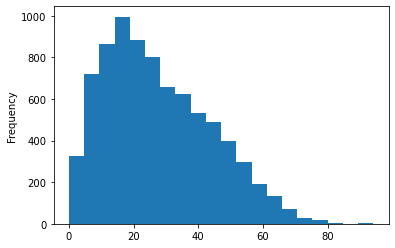

In [48]:
gdf['CIscore'].plot.hist(bins=20)

Most of the census tracts in CA have a CES score around 20, which is pretty good. It looks like there are some really high outliers though, so I'll want to keep that in mind as I go forward. It's also interesting to look at this histogram when thinking about how energy is produced throughout the state: some census tracts deal with a lot of pollution and environmental vulnerability while others can stay relatively unpolluted.

## Charts working with CES score and race

Based on what I know, I'm certain there's a relationship between CES score and race. I'll create a new dataset to look at CES scores and percentage of white residents. I know from looking it up that this 'White_pct' here refers to the non-Hispanic white population. I need to create a new dataframe, and I really only need the CES score, percentage of the tract that is white, and geometry (to map it).

In [49]:
race_CES = gdf[['tract','CIscore', 'White_pct',]]

In [50]:
# to check that it worked
race_CES.head()

,tract,CIscore,White_pct
0,6.083002e+09,29.51,31.3
1,6.083002e+09,33.17,17.4
2,6.083002e+09,22.85,40.9
3,6.083002e+09,4.45,71.9
4,6.083002e+09,5.28,65.4


I now have a new dataset with just the race and CES score. I wonder if there's a relationship between these two. I'm going to make a hexagonal bin plot to show how they're distributed. It's a little clearer than a scatterplot (which I tried before).

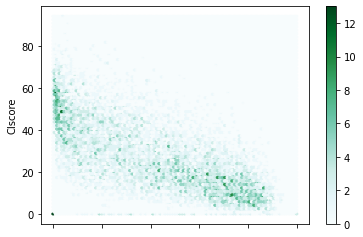

In [51]:
ax=race_CES.plot.hexbin(x='White_pct',
                        y='CIscore',
                       gridsize=100)

This chart shows the distribution of census tracts across percentage of white residents and CES score. There's over 8,000 census tracts, so this isn't that revealing. It does seem to show, however, two clusters of data. One is a cluster of tracts that are almost entirely non-white that have CES scores around 55. The other is tracts with a high percentage of white residents that have low CES scores. I'm not sure how well this would withstand deeper analysis, but the clusters are visually clear to me.

## Sorting and mapping CES scores

To continue exploring the data, I'm going to sort it. I want to see which counties have the highest CES score (that is, are most burdened by and vulnerable to environmental pollution). So I'll create a new dataframe.

In [52]:
# to sort the data by CES score
gdf_sortbyCES = gdf.sort_values(by='CIscore', ascending = False)

That created a new dataframe sorted by CES score. Just to check that it worked...

In [53]:
gdf_sortbyCES.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,edu,...,unempP,Pop_11_64_,Elderly_ov,Hispanic_p,White_pct,African_Am,Native_Ame,Asian_Amer,Other_pct,geometry
3067,6.019001e+09,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100,53.3,...,92,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,"POLYGON ((19285.231 -143860.955, 19337.280 -14..."
3630,6.071002e+09,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,100,53.3,...,72,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,"POLYGON ((221111.498 -435769.960, 221843.092 -..."
3084,6.019000e+09,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,100,42.3,...,88,72.5,6.0,63.6,5.3,18.9,0.6,9.8,1.8,"POLYGON ((17443.101 -141462.998, 18343.091 -14..."
3379,6.077001e+09,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,100,40.8,...,95,74.5,6.8,57.4,6.0,12.5,0.3,20.9,2.8,"POLYGON ((-113987.015 -7108.742, -113831.958 -..."
2916,6.019002e+09,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,100,45.1,...,94,72.1,13.1,71.8,21.4,1.2,0.5,4.5,0.6,"POLYGON ((19969.486 -145534.647, 20646.564 -14..."


It looks like the sorting worked, though I still have all the old columns. I'm going to narrow it down to just a few columns.

In [54]:
gdf_sortbyCES[['California','City','CIscore','CIscoreP', 'geometry']]

,California,City,CIscore,CIscoreP,geometry
3067,Fresno,Fresno,94.09,100,"POLYGON ((19285.231 -143860.955, 19337.280 -14..."
3630,San Bernardino,Ontario,90.68,100,"POLYGON ((221111.498 -435769.960, 221843.092 -..."
3084,Fresno,Fresno,85.97,100,"POLYGON ((17443.101 -141462.998, 18343.091 -14..."
3379,San Joaquin,Stockton,82.49,100,"POLYGON ((-113987.015 -7108.742, -113831.958 -..."
2916,Fresno,Fresno,82.03,100,"POLYGON ((19969.486 -145534.647, 20646.564 -14..."
...,...,...,...,...,...
5521,Solano,Travis AFB,0.00,0,"POLYGON ((-165293.742 31212.731, -167315.316 2..."
6485,Los Angeles,Los Angeles,0.00,0,"POLYGON ((156330.169 -427148.499, 156829.129 -..."
6452,Los Angeles,Pomona,0.00,0,"POLYGON ((202617.437 -439728.221, 202248.399 -..."
532,Orange,Anaheim,0.00,0,"POLYGON ((201165.266 -458576.548, 201859.426 -..."


I left the geometry data in so I could plot the new dataframe.

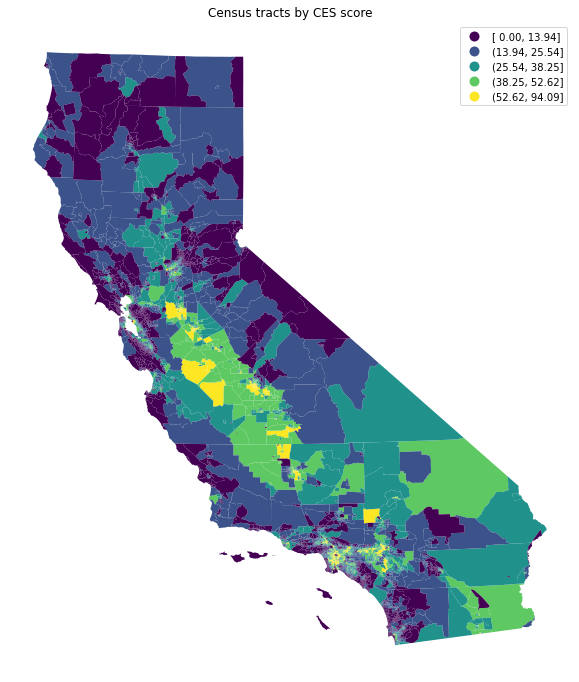

In [55]:
# to map the sorted dataframe using geopandas chloropleth maps
ax = gdf_sortbyCES.plot(figsize=(12,12),
                   column='CIscore',
                   legend=True,
                   scheme='NaturalBreaks')
ax.set(title='Census tracts by CES score')

ax.set_axis_off()
plt.show()

Here's a map that shows the state of California by census tracts sorted by CES score. I used the natural breaks scheme, which skews the data a bit by grouping tracts with high CES scores together.

The natural breaks map shows that there seems to be a natural break around CES scores of 52. I wonder how many census tracts with a CES score above 50 there are.

In [56]:
gdf_sortbyCES[gdf_sortbyCES['CIscore'] > 50]

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,edu,...,unempP,Pop_11_64_,Elderly_ov,Hispanic_p,White_pct,African_Am,Native_Ame,Asian_Amer,Other_pct,geometry
3067,6.019001e+09,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100,53.3,...,92,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,"POLYGON ((19285.231 -143860.955, 19337.280 -14..."
3630,6.071002e+09,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,100,53.3,...,72,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,"POLYGON ((221111.498 -435769.960, 221843.092 -..."
3084,6.019000e+09,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,100,42.3,...,88,72.5,6.0,63.6,5.3,18.9,0.6,9.8,1.8,"POLYGON ((17443.101 -141462.998, 18343.091 -14..."
3379,6.077001e+09,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,100,40.8,...,95,74.5,6.8,57.4,6.0,12.5,0.3,20.9,2.8,"POLYGON ((-113987.015 -7108.742, -113831.958 -..."
2916,6.019002e+09,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,100,45.1,...,94,72.1,13.1,71.8,21.4,1.2,0.5,4.5,0.6,"POLYGON ((19969.486 -145534.647, 20646.564 -14..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,6.037503e+09,7145,Los Angeles,90660,Pico Rivera,-118.094400,33.959404,50.05,89,28.3,...,76,75.5,11.5,91.3,6.2,0.4,0.1,1.5,0.5,"POLYGON ((176262.185 -449833.732, 176242.541 -..."
4020,6.065043e+09,3308,Riverside,92553,Moreno Valley,-117.248060,33.919149,50.03,89,40.0,...,89,75.5,5.9,64.4,14.3,15.8,0.2,3.2,2.2,"POLYGON ((254898.437 -452426.600, 254094.016 -..."
3673,6.071006e+09,4495,San Bernardino,92404,San Bernardino,-117.253567,34.139209,50.03,89,33.5,...,93,70.9,5.7,53.5,16.8,24.4,0.2,1.8,3.2,"POLYGON ((252793.849 -427438.776, 252558.972 -..."
6393,6.037432e+09,8210,Los Angeles,91732,El Monte,-118.005840,34.096669,50.03,89,27.2,...,51,74.2,13.3,55.6,12.4,0.8,0.1,30.5,0.7,"POLYGON ((183770.191 -432688.033, 184975.197 -..."


Let's see them on a map.

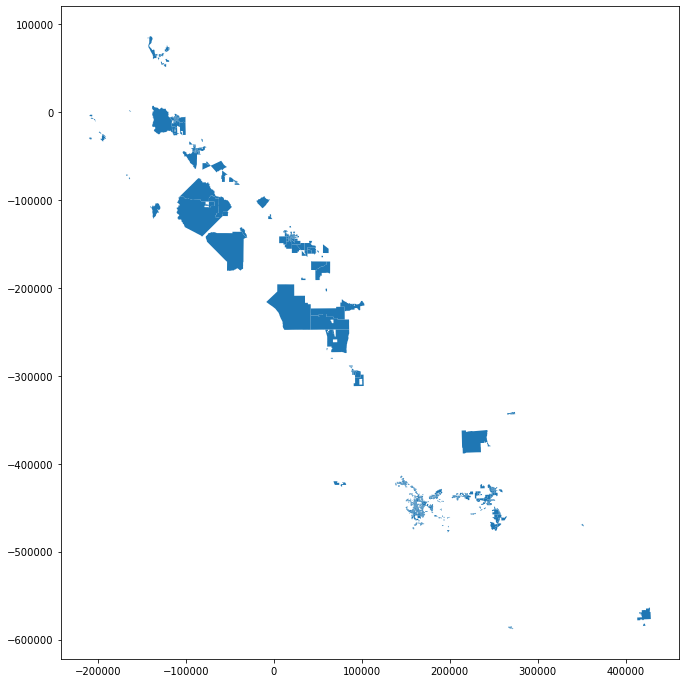

In [57]:
gdf_sortbyCES[gdf_sortbyCES['CIscore'] > 50].plot(figsize=(12,12))

I should've expected that. Unfortunately this isn't that useful since it doesn't include the basemap of California. To do that, I need to use contextily.

In [58]:
# first, reproject the dataframe to Web Mercator
gdf_web_mercator = gdf_sortbyCES.to_crs(epsg=3857)

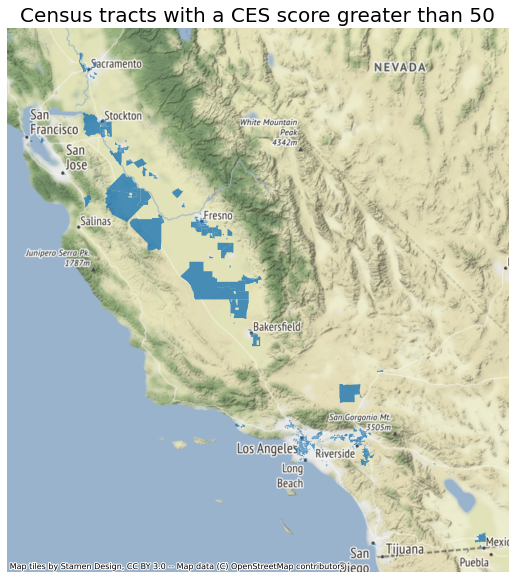

In [59]:
# then assign the data to this subplot
fig, ax = plt.subplots(figsize=(10,10))

# then add the layer from my data
ax = gdf_web_mercator[gdf_web_mercator['CIscore'] > 50].plot(ax=ax, alpha=0.8)

# turn the axis off (it doesn't show me anything useful)
ax.axis('off')

#add a title
ax.set_title('Census tracts with a CES score greater than 50', fontsize=20)

# and add a basemap
ctx.add_basemap(ax)

This shows the tracts with a CES score greater than 50. It looks like many of them are in the Central Valley, though there are a lot in Southern California too.

In order to make an interactive version of the map above, I need to create a new dataframe for these tracts.

In [60]:
ces_over50 = gdf_sortbyCES[gdf_sortbyCES['CIscore'] > 50]

In [61]:
# to check my work
ces_over50.tail()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,edu,...,unempP,Pop_11_64_,Elderly_ov,Hispanic_p,White_pct,African_Am,Native_Ame,Asian_Amer,Other_pct,geometry
7915,6.037503e+09,7145,Los Angeles,90660,Pico Rivera,-118.094400,33.959404,50.05,89,28.3,...,76,75.5,11.5,91.3,6.2,0.4,0.1,1.5,0.5,"POLYGON ((176262.185 -449833.732, 176242.541 -..."
4020,6.065043e+09,3308,Riverside,92553,Moreno Valley,-117.248060,33.919149,50.03,89,40.0,...,89,75.5,5.9,64.4,14.3,15.8,0.2,3.2,2.2,"POLYGON ((254898.437 -452426.600, 254094.016 -..."
3673,6.071006e+09,4495,San Bernardino,92404,San Bernardino,-117.253567,34.139209,50.03,89,33.5,...,93,70.9,5.7,53.5,16.8,24.4,0.2,1.8,3.2,"POLYGON ((252793.849 -427438.776, 252558.972 -..."
6393,6.037432e+09,8210,Los Angeles,91732,El Monte,-118.005840,34.096669,50.03,89,27.2,...,51,74.2,13.3,55.6,12.4,0.8,0.1,30.5,0.7,"POLYGON ((183770.191 -432688.033, 184975.197 -..."
1014,6.085500e+09,6339,Santa Clara,95112,San Jose,-121.892742,37.358556,50.03,89,26.1,...,60,77.5,7.7,57.9,16.9,2.1,0.4,20.6,2.2,"POLYGON ((-167799.640 -72332.391, -168449.880 ..."


I know from this that the lowest CES score in my new dataframe is 50.03, so it worked. Now I'm going to use plotly to create a slippery map of these census tracts.

In [64]:
fig = px.scatter_mapbox(ces_over50, 
                        lat="Latitude", 
                        lon="Longitude",
                        hover_name='California',
                        hover_data=['CIscore'],
                        title='Census tracts with CES greater than 50',
                        zoom = 6
                       )

fig.update_layout(mapbox_style="stamen-terrain")

fig.show()

This map is the same as above but interactive. You can zoom in and out and hover over the tracts to see what county they're in and their CES score.